### Deadline 23.01.2022

# Первая нейросетка

Ну что ж, пришло время построить свою первую нейронную сеть. У нас будет искуственная задачка и мы посмотрим на её примере, как работают различные алгоритмы машинного обучения.

In [81]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [82]:
df = pd.read_csv('https://raw.githubusercontent.com/AndrosovDima/HSE_SUMMER_2022/main/homework/hw_1/data.csv',index_col=0)

In [83]:
df.head()

,x1,x2,y
0,-4.626272,-6.658988,0
1,-7.789640,0.262519,0
2,-8.739678,1.537758,0
3,-2.546441,-7.705224,0
4,-2.751506,-7.940187,0


Как и в любой задаче машинного обучения для начала надо визуализировать данные. 
Не зря же нашу нейронную сеть мы так долго учим?


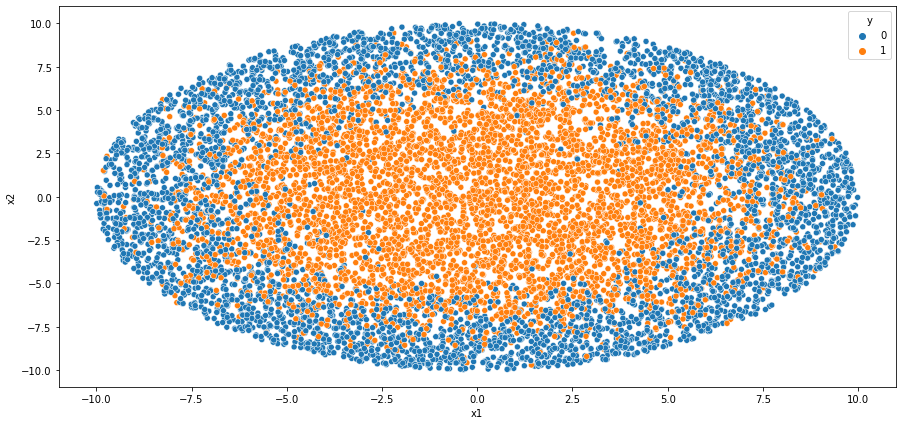

In [84]:
plt.figure(figsize=(15, 7))
sns.scatterplot(x="x1", y="x2", hue="y", data = df)

После просмотра данных встает несколько вопросов:
 * 1) Можем ли мы построить идеальную модель? (условная метрика точность) <br> 
 Ответ:  Кажется, что нельзя построить идеальную модель, так как некоторые наблюдения двух разных классов почти совпадают (на графике видно наложение точек) <br>
 * 2) Что ещё мы хотим знать о выборке? <br> Ответ: Новые признаки никогда не помешают 
 * 3) Какие алгоритмы машинного обучения мы можем эффективно здесь использовать? <br> Ответ: Зависимость нелинейная, задача бинарной классификации, поэтому подойдут линейные модели ML не подойдут (такие как линейная регрессия). Подойдут логистическая регрессия, non linear svm, нейронные сети с нелинейной функцией активации

После описательного анализа приступим к построению моделей. Для начала посмотрим, что нам даст Логистическая регрессия. 

In [85]:
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score

# разобьем выборку на трэйн/тест
X_train, X_test, y_train, y_test = train_test_split(df[['x1','x2']], df['y'], test_size = 0.33)

Точность нашей модели 0.6057575757575757


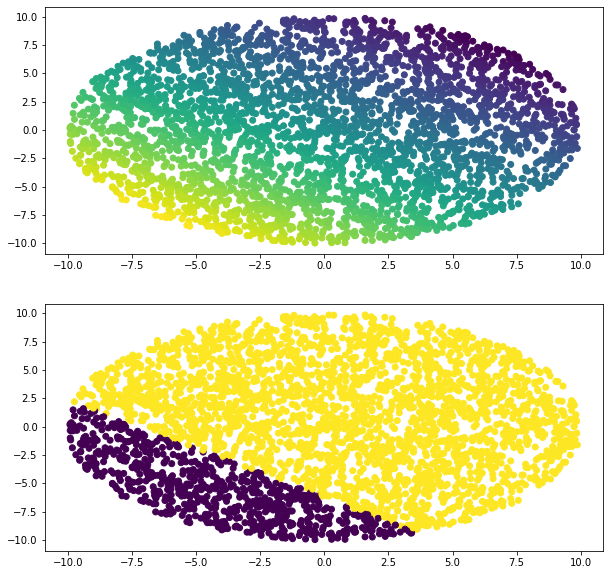

In [16]:
from sklearn.linear_model import LogisticRegression


#########################################
# Ваш код для Логистической регрессии
lr = LogisticRegression()
lr.fit(X_train, y_train)

predict_logit = lr.predict(X_test)
predict_log_proba = lr.predict_proba(X_test)[:,0]

#########################################


print(f'Точность нашей модели {accuracy_score(predict_logit, y_test)}')

# Заодно завизуализируем полученные результаты
fig, (ax1, ax2) = plt.subplots(2, figsize=(10, 10))
ax1.scatter(X_test['x1'], X_test['x2'], c = predict_log_proba) # не очень понимаю, зачем визуализировать вероятности, а не предсказанные значения
ax2.scatter(X_test['x1'], X_test['x2'], c = predict_logit)
plt.show()

Вообще машинное обучение не только про алгоритмы (нейронные сети не исключение),
 а скорее про обработку данных. Что нам надо добавить, чтобы наш алгоритм отработал без проблем?

Так как эллипс описывается формулой:  $ \frac{x^2}{a^2}+\frac{y^2}{b^2}=1 $, возведем x и y в квадрат. 

Точность нашей модели 0.8442424242424242


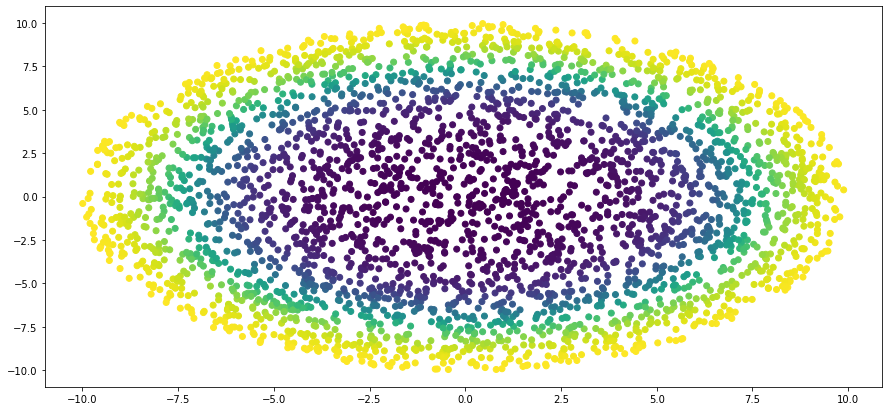

In [28]:
# Повторяем наш код, только с новыми фичами - смотрим на магию
df_new = df.copy()

#########################################
# ваш код для фичей и новой модели

df_new['new_feature_1'] = df_new['x1'] ** 2
df_new['new_feature_2'] = df_new['x2'] ** 2

X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(df_new[['x1', 'x2', 'new_feature_1', 'new_feature_2']],
                                                                    df_new['y'], test_size = 0.33)
lr2 = LogisticRegression(solver='liblinear', random_state=12)
lr2.fit(X_train_new, y_train_new)

predict_logit = lr2.predict(X_test_new)
predict_log_proba = lr2.predict_proba(X_test_new)[:,0]

#########################################

print(f'Точность нашей модели {accuracy_score(predict_logit,y_test_new)}')

plt.figure(figsize=(15, 7))
plt.scatter(X_test_new['x1'], X_test_new['x2'], c = predict_log_proba)
plt.show()

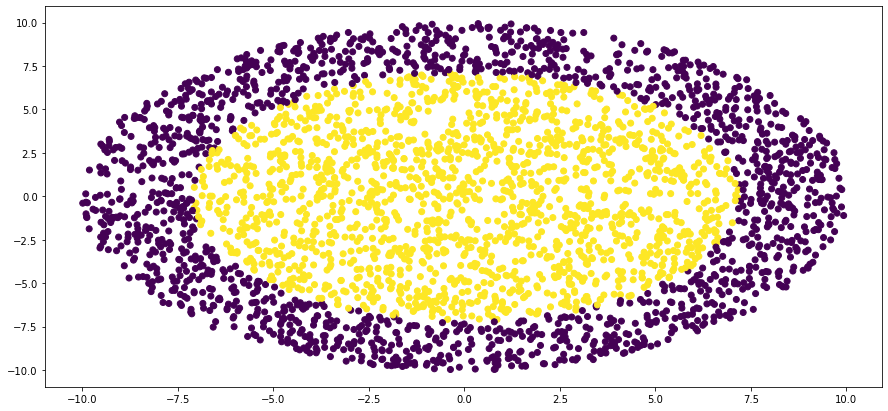

In [24]:
plt.figure(figsize=(15, 7))
plt.scatter(X_test_new['x1'], X_test_new['x2'], c = predict_logit)
plt.show()

Переходим к следующиму классу алгоритмов - деревья решений. Какая особенность есть у деревьев? Какой параметр надо зафикисировать, чтобы эта особенность не испортила обучение? 

Особенность деревьев - быстрое переобучение. Надо зафиксировать max_depth

Точность нашей модели 0.8212121212121212


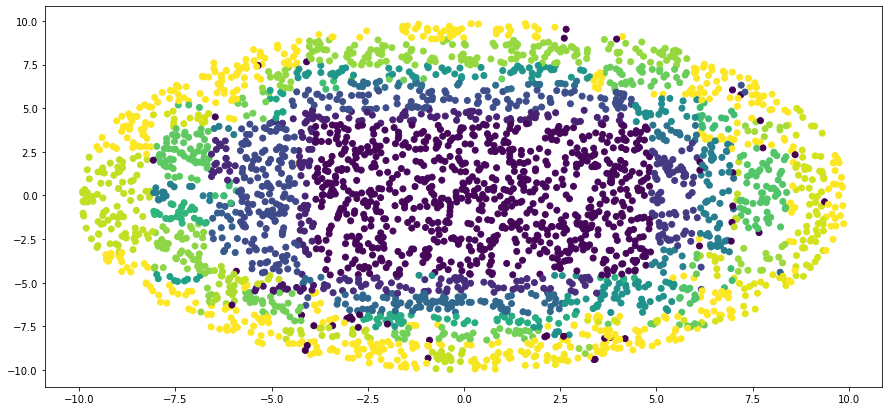

In [9]:
from sklearn.tree import DecisionTreeClassifier

#########################################

dtree = DecisionTreeClassifier(max_depth=9)

dtree.fit(X_train, y_train)

predict_tree = dtree.predict(X_test)

print(f'Точность нашей модели {accuracy_score(predict_tree, y_test)}')

predict_tree_proba = dtree.predict_proba(X_test)[:,0]

#########################################

plt.figure(figsize=(15, 7))
plt.scatter(X_test['x1'], X_test['x2'], c = predict_tree_proba)
plt.show()

Поможет ли в данном случае ансамблирование? Когда в целом ансамбль дает хорошие результаты?

Ансамбль, в целом, дает хорошие результаты, когда классы сбалансированы

In [10]:
sum(y_test) 

1695

Точность нашей модели 0.8381818181818181


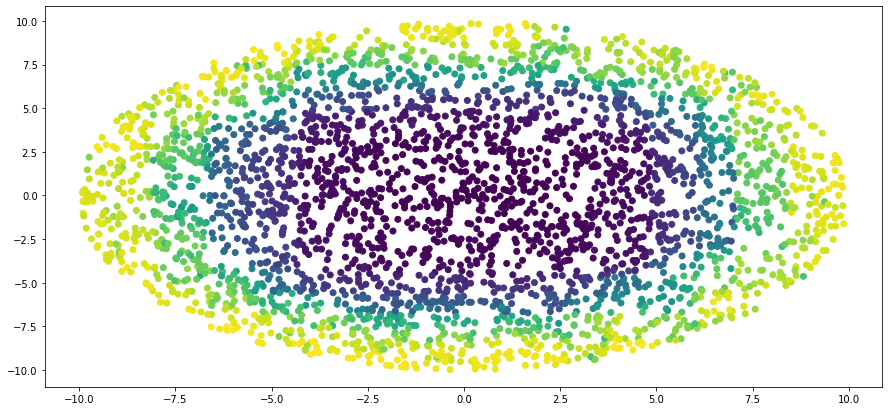

In [11]:
from sklearn.ensemble import RandomForestClassifier

#########################################

forest = RandomForestClassifier(max_depth=9)
forest.fit(X_train, y_train)
predict_forest = forest.predict(X_test)
print(f'Точность нашей модели {accuracy_score(predict_forest, y_test)}')

predict_forest_proba = forest.predict_proba(X_test)[:,0]

#########################################

plt.figure(figsize=(15, 7))
plt.scatter(X_test['x1'], X_test['x2'], c = predict_forest_proba)
plt.show()

ну и наконец мы добрались до нейронок - пора собрать нашу нейроночку под эту задачу.

Соберем простенькую нейронку - нам хватит 2х слоев по 5 нейронов в каждом. Смотрим на предыдущую тетрадку и копипастим все, что мы там видим! (можно для убыстрения процесса добавить callback с ранней остановкой)

In [38]:
# Подгружаем tensorflow 
import tensorflow as tf
keras = tf.keras

print(tf.__version__)
print(keras.__version__) 

from tensorflow.keras.models import Sequential   # Последовательность слоёв
import tensorflow.keras.layers as L              # Разные слои
import tensorflow.keras.optimizers as opt        # Оптимизаторы
from tensorflow.keras.utils import to_categorical

2.8.2
2.8.0


In [61]:
from tensorflow.keras.metrics import Accuracy

def get_new_model( ):
    acc = Accuracy()

    model = Sequential() 
    model.add(L.Dense(25, input_dim = X_train.shape[1], kernel_initializer='random_normal'))
    model.add(L.Activation('sigmoid'))
    model.add(L.Dense(25, kernel_initializer='random_normal'))
    model.add(L.Activation('relu'))
    model.add(L.Dense(2, activation='sigmoid', kernel_initializer = 'random_normal'))

    optimizer = opt.Adam(learning_rate=1e-3)

    model.compile(loss = 'categorical_crossentropy', 
                  metrics=['acc'], 
                  optimizer=optimizer)
    
    return model

In [62]:
model = get_new_model( )

In [63]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 25)                75        
                                                                 
 activation_8 (Activation)   (None, 25)                0         
                                                                 
 dense_13 (Dense)            (None, 25)                650       
                                                                 
 activation_9 (Activation)   (None, 25)                0         
                                                                 
 dense_14 (Dense)            (None, 2)                 52        
                                                                 
Total params: 777
Trainable params: 777
Non-trainable params: 0
_________________________________________________________________


Точность нашей модели 0.8321212121212122


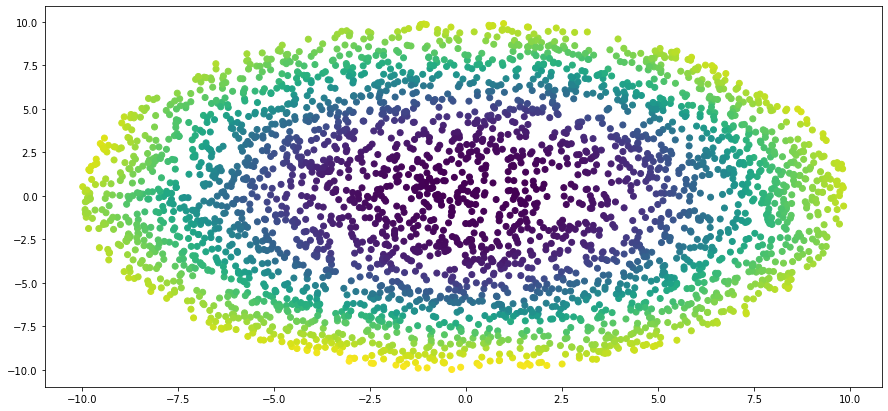

In [86]:
#########################################
# Ваш код
model.fit(X_train, to_categorical(y_train), validation_split=0.2, epochs=30, verbose=False, batch_size=128)
predict_neural = model.predict(X_test)[:,0]
predict_classes = tf.argmax(model.predict(X_test), axis=1)

print(f'Точность нашей модели {accuracy_score(predict_classes, y_test)}')
#########################################

plt.figure(figsize=(15, 7))
plt.scatter(X_test['x1'], X_test['x2'], c = predict_neural)
plt.show()

Вывод: лучше всего справилась логистическая регрессия. Но это из-за добавления новых признаков, которые хорошо описывают квадратичную зависимость. Если бы зависимость была бы более сложная, то нейронная сеть справилась бы лучше

На этом наше приключение сегодня закончилось. Вопросы максимально желательны :)

Вопрос: почему нужно визуализировать вероятности, а не предсказанные классы? 